# GTZAN - Mahindra Final

`Music Genre Classification Problem`. Experts have been trying for a long time to understand sound & what differentiates one from another. How to visualize sound. What makes one tone different from another.

We are going to analyze the features extracted from the GTZAN dataset and build different type of ensemble models to see how better we can differentiate one genre from another.

Our Datasets contains 10 genres and 5 mahindra labels:-

* Family
    - Country
    - Jazz
* Relax
    - Blues
    - Classical
* Adventure
    - Hiphop
    - Metal
* Party
    - Pop
    - Disco
* Motivational
    - Reggae
    - Rock

# Reading & Understanding Data
## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sklearn.metrics as skm
import sklearn.model_selection as skms
import sklearn.preprocessing as skp
import random
import librosa, IPython
import librosa.display as lplt
import os
seed = 12
np.random.seed(seed)

### Loading Dataset

In [2]:
df = pd.read_csv('../Data/features_30_sec.csv')
df

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00095.wav,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,...,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665,rock
996,rock.00096.wav,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,...,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624,rock
997,rock.00097.wav,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,...,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515,rock
998,rock.00098.wav,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,...,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088,rock


### About the dataset

In [3]:
df.columns

Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

In [4]:
############## MAPPING LOGIC ################
for i in range(len(df)):
    if df.iloc[i, -1] == "blues" or df.iloc[i, -1] == "classical":
        df["label"][i] = "relax"
#         print(df["label"][i])
    elif df.iloc[i, -1] == "country" or df.iloc[i, -1] == "jazz":
        df["label"][i] = "family"
#         print(df["label"][i])
    elif df.iloc[i, -1] == "hiphop" or df.iloc[i, -1] == "metal":
        df["label"][i] = "adventure"
#         print(df["label"][i])
    elif df.iloc[i, -1] == "pop" or df.iloc[i, -1] == "disco":
        df["label"][i] = "party"
#         print(df["label"][i])
    elif df.iloc[i, -1] == "reggae" or df.iloc[i, -1] == "rock":
        df["label"][i] = "motivational"
#         print(df["label"][i])

In [5]:
print("Dataset has",df.shape)
print("Count of Positive and Negative samples")
df.label.value_counts().reset_index()

Dataset has (1000, 60)
Count of Positive and Negative samples


,index,label
0,relax,200
1,family,200
2,party,200
3,adventure,200
4,motivational,200


# Data Visualization

In [6]:
audio_fp = '../Data/genres_original/blues/blues.00055.wav'
audio_data, sr = librosa.load(audio_fp)
audio_data, _ = librosa.effects.trim(audio_data)

In [7]:
# play sample file
IPython.display.Audio(audio_data, rate=sr)

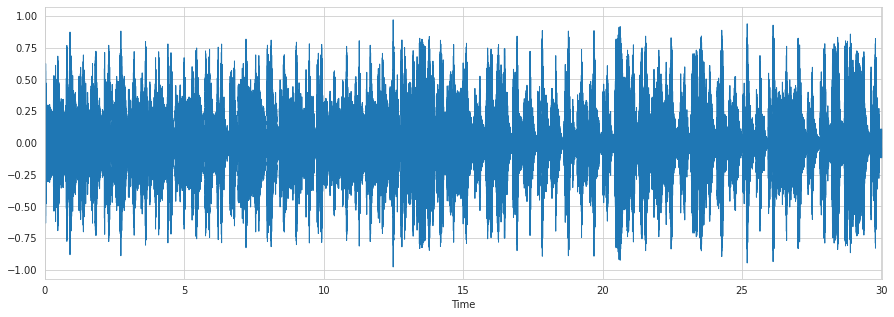

In [8]:
# plot sample file
plt.figure(figsize=(15,5))
lplt.waveplot(audio_data)
plt.show()

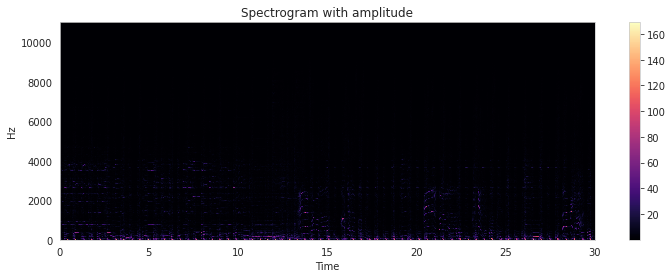

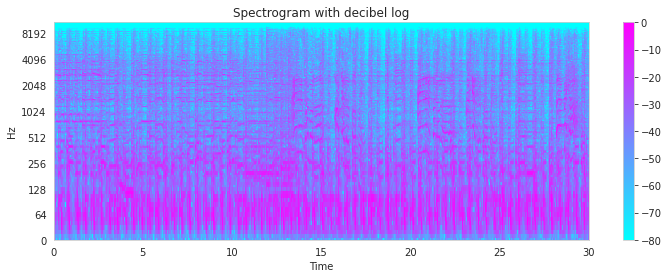

In [9]:
# Default FFT window size
n_fft = 2048 # window size
hop_length = 512 # window hop length for STFT

stft = librosa.stft(audio_data, n_fft=n_fft, hop_length=hop_length)
stft_db = librosa.amplitude_to_db(stft, ref=np.max)

plt.figure(figsize=(12,4))
lplt.specshow(stft, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.title("Spectrogram with amplitude")
plt.show()

plt.figure(figsize=(12,4))
lplt.specshow(stft_db, sr=sr, x_axis='time', y_axis='log', cmap='cool')
plt.colorbar()
plt.title("Spectrogram with decibel log")
plt.show()

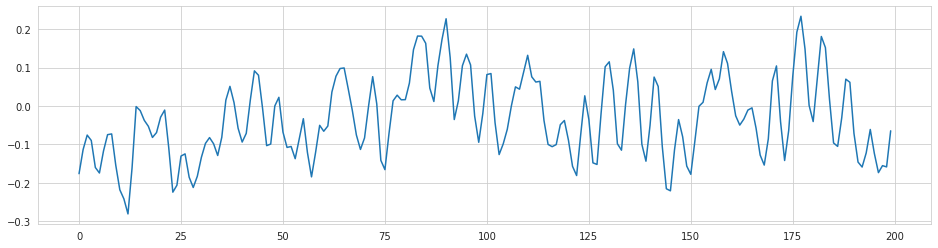

In [10]:
# plot zoomed audio wave 
start = 1000
end = 1200
plt.figure(figsize=(16,4))
plt.plot(audio_data[start:end])
plt.show()

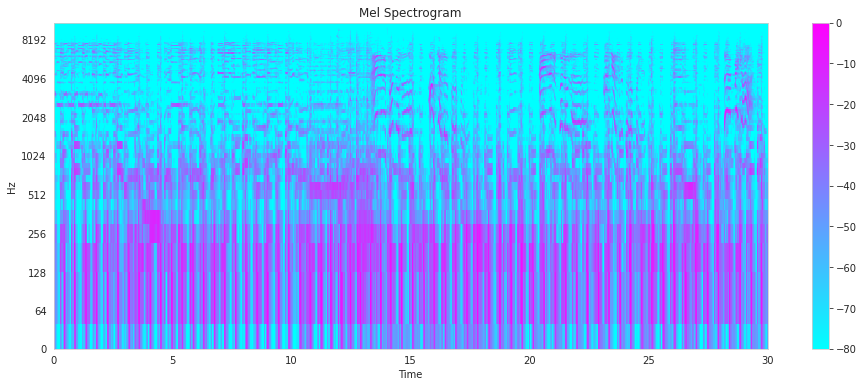

In [11]:
mel_spec = librosa.feature.melspectrogram(audio_data, sr=sr)
mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)
plt.figure(figsize=(16,6))
lplt.specshow(mel_spec_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log', cmap='cool')
plt.colorbar()
plt.title("Mel Spectrogram")
plt.show()

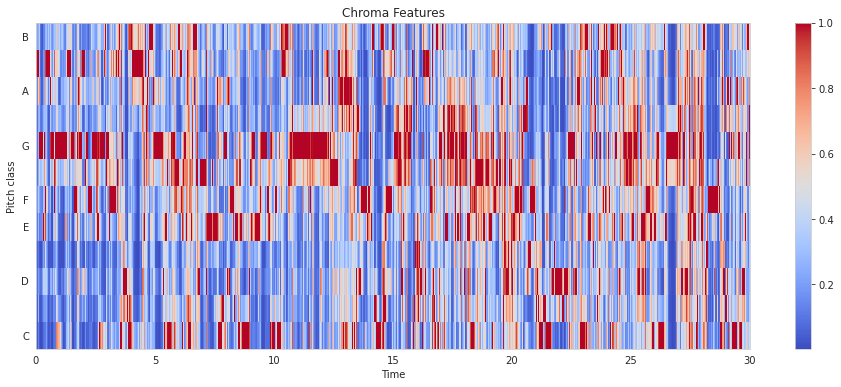

In [12]:
chroma = librosa.feature.chroma_stft(audio_data, sr=sr)
plt.figure(figsize=(16,6))
lplt.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.colorbar()
plt.title("Chroma Features")
plt.show()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5]),
 [Text(0, 0.5, 'chroma_stft_mean'),
  Text(0, 1.5, 'rms_mean'),
  Text(0, 2.5, 'spectral_centroid_mean'),
  Text(0, 3.5, 'spectral_bandwidth_mean'),
  Text(0, 4.5, 'rolloff_mean'),
  Text(0, 5.5, 'zero_crossing_rate_mean'),
  Text(0, 6.5, 'harmony_mean'),
  Text(0, 7.5, 'perceptr_mean'),
  Text(0, 8.5, 'mfcc1_mean'),
  Text(0, 9.5, 'mfcc2_mean'),
  Text(0, 10.5, 'mfcc3_mean'),
  Text(0, 11.5, 'mfcc4_mean'),
  Text(0, 12.5, 'mfcc5_mean'),
  Text(0, 13.5, 'mfcc6_mean'),
  Text(0, 14.5, 'mfcc7_mean'),
  Text(0, 15.5, 'mfcc8_mean'),
  Text(0, 16.5, 'mfcc9_mean'),
  Text(0, 17.5, 'mfcc10_mean'),
  Text(0, 18.5, 'mfcc11_mean'),
  Text(0, 19.5, 'mfcc12_mean'),
  Text(0, 20.5, 'mfcc13_mean'),
  Text(0, 21.5, 'mfcc14_mean'),
  Text(0, 22.5, 'mfcc15_mean'),
  Text(0, 23.5, 'mfcc16_mean'),
  Text(0, 24.5, 

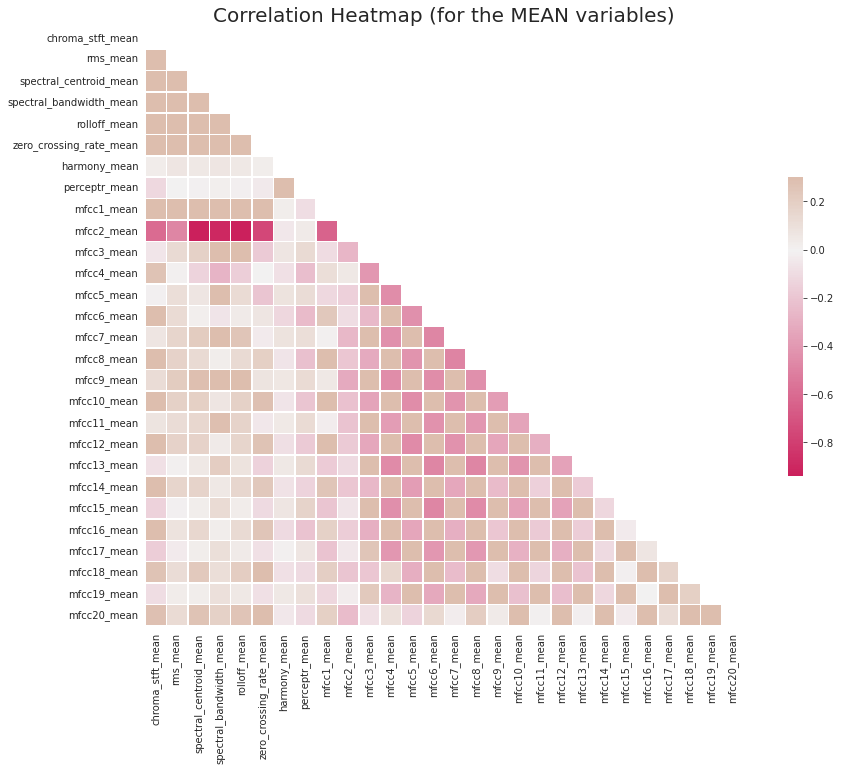

In [13]:
# Computing the Correlation Matrix
spike_cols = [col for col in df.columns if 'mean' in col]
corr = df[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

Text(0, 0.5, 'BPM')

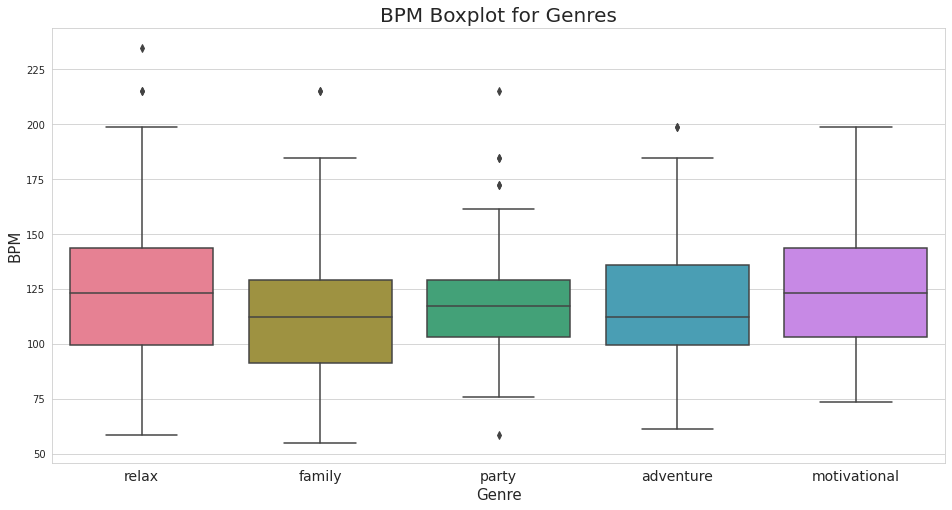

In [14]:
x = df[["label", "tempo"]]

fig, ax = plt.subplots(figsize=(16, 8));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)

Text(0, 0.5, 'Principal Component 2')

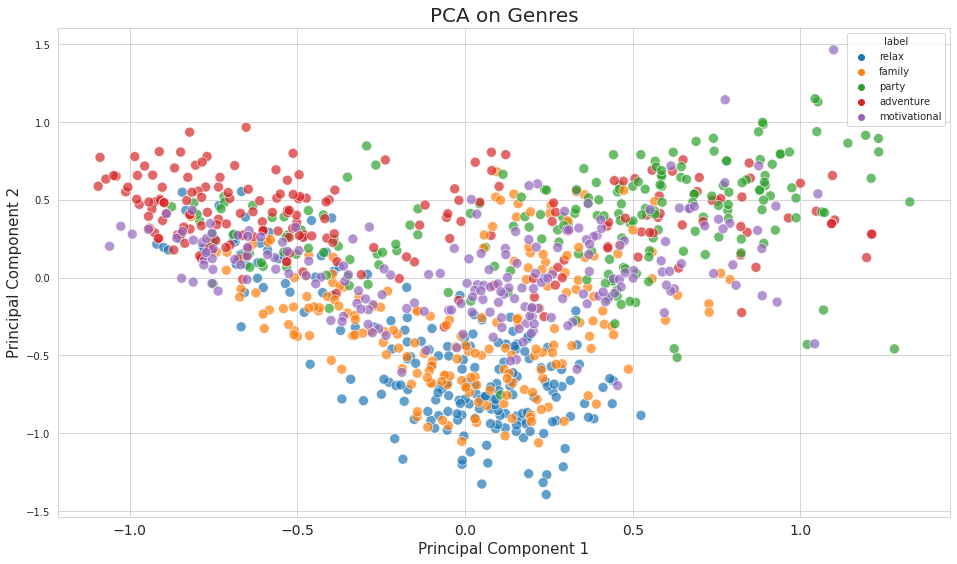

In [15]:
data = df.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

# normalize
cols = X.columns
min_max_scaler = skp.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

# Top 2 pca components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

plt.figure(figsize = (16, 9))
sns.scatterplot(x = "pc1", y = "pc2", data = finalDf, hue = "label", alpha = 0.7, s = 100);

plt.title('PCA on Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)

# Data Preparation

- Treat missing values.
- Outlier Treatment
- Define dummy variables for categorical variables.

## Missing Value Treatment

In [16]:
# find all columns with any NA values
print("Columns with NA values are",list(df.columns[df.isnull().any()]))

Columns with NA values are []


`No null values in the dataset`



`There are no categorical variable as such. Hence, Dummy variable creation is not needed.`

## Encode Genre Label

In [17]:
# map labels to index
label_index = dict()
index_label = dict()
for i, x in enumerate(df.label.unique()):
    label_index[x] = i
    index_label[i] = x
print(label_index)
print(index_label)

{'relax': 0, 'family': 1, 'party': 2, 'adventure': 3, 'motivational': 4}
{0: 'relax', 1: 'family', 2: 'party', 3: 'adventure', 4: 'motivational'}


In [18]:
# update labels in df to index
df.label = [label_index[l] for l in df.label]

# Split Train, Dev & Test Sets

In [19]:
# shuffle samples
df_shuffle = df.sample(frac=1, random_state=seed).reset_index(drop=True)

In [20]:
df_shuffle

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,jazz.00018.wav,661794,0.353474,0.087755,0.052264,0.000316,1993.352766,6.475348e+04,2127.165109,36027.039069,...,57.230133,-1.110214,48.080849,-0.784249,57.033504,-2.984207,55.737625,0.350456,64.126846,1
1,reggae.00071.wav,661504,0.408769,0.096618,0.150835,0.004892,3110.220723,1.814941e+06,2852.735496,268500.906438,...,48.285610,2.223237,45.917774,3.382898,67.073578,-2.665890,54.100197,0.517763,52.585522,4
2,pop.00097.wav,661504,0.466970,0.091385,0.204381,0.019627,3508.786537,2.285746e+06,3309.980255,177544.009552,...,67.508545,0.499802,70.450508,4.146517,72.737991,1.753214,74.673553,8.227995,117.771561,2
3,country.00074.wav,661794,0.355025,0.086732,0.082337,0.002955,1534.025677,4.529521e+05,1697.071182,202466.976700,...,64.278542,-5.531946,57.897591,-2.365506,48.296890,-6.537549,65.640800,-5.901509,53.836391,1
4,disco.00025.wav,661794,0.358008,0.093773,0.107915,0.003411,2410.182747,5.931347e+05,2575.801114,206266.180258,...,36.904137,-4.594844,38.994881,-1.801064,44.782356,-1.321520,53.607117,-1.968250,58.384445,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,country.00041.wav,661794,0.397855,0.082284,0.113301,0.000587,2634.080774,8.207470e+05,2898.541576,233608.971679,...,42.996780,-2.325614,41.673706,-4.613111,41.339603,-0.618727,29.171967,-4.939899,29.804676,1
996,country.00053.wav,661794,0.373361,0.084626,0.133585,0.001125,2271.807570,2.410308e+05,2297.417361,60633.438392,...,39.857033,-9.550981,47.889519,4.063068,47.469940,-5.586479,50.539799,-0.698804,59.122414,1
997,disco.00090.wav,661504,0.485229,0.076683,0.090661,0.002879,2574.454343,4.329060e+05,2396.480081,95966.324238,...,32.648281,-6.473699,43.241314,5.798188,31.986368,-3.494546,35.222599,-0.060173,35.280766,2
998,metal.00067.wav,661504,0.469171,0.074049,0.136296,0.001422,2254.453491,1.815253e+05,2070.847623,65660.608293,...,38.042656,-7.205870,44.357632,0.669697,42.617527,-4.831531,40.611927,-2.106510,28.756109,3


In [21]:
# remove irrelevant columns
df_shuffle.drop(['filename', 'length'], axis=1, inplace=True)
df_y = df_shuffle.pop('label')
df_X = df_shuffle

# split into train dev and test
X_train, df_test_valid_X, y_train, df_test_valid_y = skms.train_test_split(df_X, df_y, train_size=0.7, random_state=seed, stratify=df_y)
X_dev, X_test, y_dev, y_test = skms.train_test_split(df_test_valid_X, df_test_valid_y, train_size=0.66, random_state=seed, stratify=df_test_valid_y)

In [22]:
print(f"Train set has {X_train.shape[0]} records out of {len(df_shuffle)} which is {round(X_train.shape[0]/len(df_shuffle)*100)}%")
print(f"Dev set has {X_dev.shape[0]} records out of {len(df_shuffle)} which is {round(X_dev.shape[0]/len(df_shuffle)*100)}%")
print(f"Test set has {X_test.shape[0]} records out of {len(df_shuffle)} which is {round(X_test.shape[0]/len(df_shuffle)*100)}%")

Train set has 700 records out of 1000 which is 70%
Dev set has 198 records out of 1000 which is 20%
Test set has 102 records out of 1000 which is 10%


In [23]:
print(y_train.value_counts()[0]/y_train.shape[0]*100)
print(y_dev.value_counts()[0]/y_dev.shape[0]*100)
print(y_test.value_counts()[0]/y_test.shape[0]*100)

20.0
20.2020202020202
19.607843137254903


## Scale the Features - Need to do to incoming new data as well.

In [24]:
scaler = skp.StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_dev = pd.DataFrame(scaler.transform(X_dev), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

# Model Building

In [25]:
import tensorflow as tf
print("TF version:-", tf.__version__)
import keras as k
tf.random.set_seed(seed)

2022-06-30 11:15:33.134415: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-06-30 11:15:33.138777: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-30 11:15:33.138797: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


TF version:- 2.9.1


In [26]:
ACCURACY_THRESHOLD = 0.94

class myCallback(k.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') > ACCURACY_THRESHOLD):
            print("\n\nStopping training as we have reached %2.2f%% accuracy!" %(ACCURACY_THRESHOLD*100))   
            self.model.stop_training = True

def trainModel(model, epochs, optimizer):
    batch_size = 128
    callback = myCallback()
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics='accuracy'
    )
    return model.fit(X_train, y_train, validation_data=(X_dev, y_dev), epochs=epochs, 
                     batch_size=batch_size, callbacks=[callback])

def plotHistory(history):
    print("Max. Validation Accuracy",max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()


In [27]:
print(X_train.head())

   chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0          0.671530         0.181710  0.393931  0.335384   
1         -0.156504         0.242264 -0.575142 -0.548094   
2         -0.351733         0.245112 -0.733305 -0.394643   
3         -0.431063         2.153309 -1.272329 -0.509898   
4          1.394608        -0.427879  1.442111  4.045757   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0               -0.236570              -0.692782                -0.497032   
1                1.038008               1.177481                 1.487611   
2               -0.780663              -0.167281                -0.461800   
3               -0.493374               0.611199                 0.916058   
4                0.143764               1.022972                 0.672811   

   spectral_bandwidth_var  rolloff_mean  rolloff_var  ...  mfcc16_mean  \
0               -0.608549     -0.347693    -0.752003  ...     1.110252   
1               -0.132671   

In [28]:
model_1 = k.models.Sequential([
    k.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dense(128, activation='relu'),
    k.layers.Dense(64, activation='relu'),
    k.layers.Dense(5, activation='softmax'),
])
print(model_1.summary())
model_1_history = trainModel(model=model_1, epochs=70, optimizer='adam')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               14848     
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 5)                 325       
                                                                 
Total params: 56,325
Trainable params: 56,325
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/70


2022-06-30 11:15:34.317835: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-30 11:15:34.317875: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-30 11:15:34.317900: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (myelin-mfp-lptp-030): /proc/driver/nvidia/version does not exist
2022-06-30 11:15:34.318275: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


6/6 [==============================] - 0s 30ms/step - loss: 1.5089 - accuracy: 0.3829 - val_loss: 1.3073 - val_accuracy: 0.4444
Epoch 2/70
6/6 [==============================] - 0s 7ms/step - loss: 1.1957 - accuracy: 0.5314 - val_loss: 1.1207 - val_accuracy: 0.5000
Epoch 3/70
6/6 [==============================] - 0s 8ms/step - loss: 0.9884 - accuracy: 0.6243 - val_loss: 1.0027 - val_accuracy: 0.6111
Epoch 4/70
6/6 [==============================] - 0s 7ms/step - loss: 0.8377 - accuracy: 0.6914 - val_loss: 0.9289 - val_accuracy: 0.5758
Epoch 5/70
6/6 [==============================] - 0s 8ms/step - loss: 0.7324 - accuracy: 0.7471 - val_loss: 0.8642 - val_accuracy: 0.6465
Epoch 6/70
6/6 [==============================] - 0s 7ms/step - loss: 0.6339 - accuracy: 0.7686 - val_loss: 0.8060 - val_accuracy: 0.6515
Epoch 7/70
6/6 [==============================] - 0s 7ms/step - loss: 0.5581 - accuracy: 0.8086 - val_loss: 0.7869 - val_accuracy: 0.6667
Epoch 8/70
6/6 [============================

6/6 [==============================] - 0s 6ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 1.1894 - val_accuracy: 0.7576
Epoch 61/70
6/6 [==============================] - 0s 6ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 1.1977 - val_accuracy: 0.7576
Epoch 62/70
6/6 [==============================] - 0s 6ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 1.2051 - val_accuracy: 0.7576
Epoch 63/70
6/6 [==============================] - 0s 6ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 1.2116 - val_accuracy: 0.7626
Epoch 64/70
6/6 [==============================] - 0s 5ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 1.2119 - val_accuracy: 0.7576
Epoch 65/70
6/6 [==============================] - 0s 4ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 1.2194 - val_accuracy: 0.7576
Epoch 66/70
6/6 [==============================] - 0s 5ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.2267 - val_accuracy: 0.7576
Epoch 67/70
6/6 [======================

Max. Validation Accuracy 0.7626262903213501


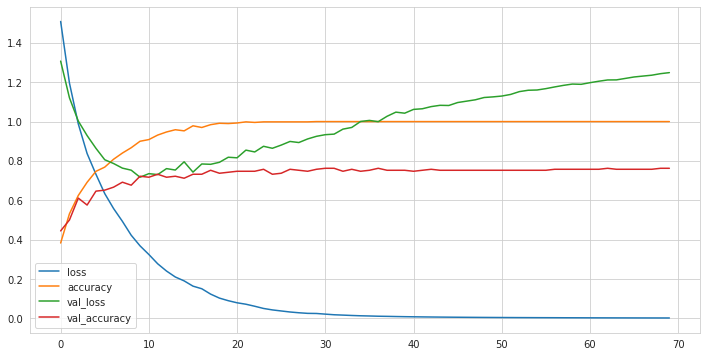

In [29]:
plotHistory(model_1_history)

In [30]:
model_2 = k.models.Sequential([
    k.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dropout(0.2),
    
    k.layers.Dense(256, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(128, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(64, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(5, activation='softmax'),
])
print(model_2.summary())
model_2_history = trainModel(model=model_2, epochs=100, optimizer='adam')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               29696     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)               

6/6 [==============================] - 0s 6ms/step - loss: 0.0347 - accuracy: 0.9900 - val_loss: 1.3512 - val_accuracy: 0.7323
Epoch 49/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0349 - accuracy: 0.9871 - val_loss: 1.2708 - val_accuracy: 0.7525
Epoch 50/100
6/6 [==============================] - 0s 13ms/step - loss: 0.0286 - accuracy: 0.9943 - val_loss: 1.2904 - val_accuracy: 0.7525
Epoch 51/100
6/6 [==============================] - 0s 12ms/step - loss: 0.0404 - accuracy: 0.9929 - val_loss: 1.4425 - val_accuracy: 0.7323
Epoch 52/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0309 - accuracy: 0.9929 - val_loss: 1.3540 - val_accuracy: 0.7374
Epoch 53/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0337 - accuracy: 0.9900 - val_loss: 1.3386 - val_accuracy: 0.7525
Epoch 54/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0327 - accuracy: 0.9914 - val_loss: 1.3344 - val_accuracy: 0.7475
Epoch 55/100
6/6 [============

Max. Validation Accuracy 0.7828282713890076


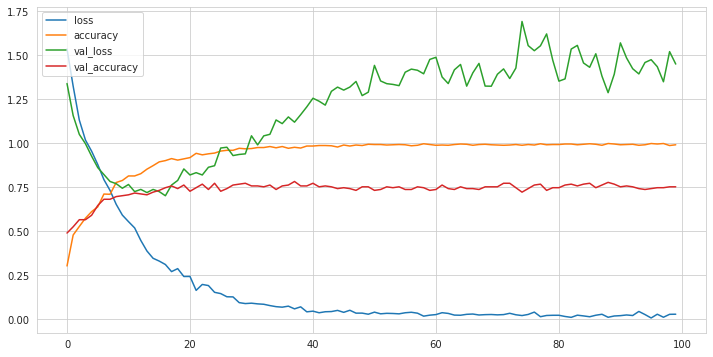

In [31]:
plotHistory(model_2_history)

In [32]:
model_3 = k.models.Sequential([
    k.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dropout(0.2),
    
    k.layers.Dense(256, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(128, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(64, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(5, activation='softmax'),
])
print(model_3.summary())
model_3_history = trainModel(model=model_3, epochs=700, optimizer='sgd')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               29696     
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 64)               

Epoch 48/700
6/6 [==============================] - 0s 7ms/step - loss: 1.0825 - accuracy: 0.5671 - val_loss: 1.0679 - val_accuracy: 0.5556
Epoch 49/700
6/6 [==============================] - 0s 7ms/step - loss: 1.1021 - accuracy: 0.5486 - val_loss: 1.0620 - val_accuracy: 0.5657
Epoch 50/700
6/6 [==============================] - 0s 7ms/step - loss: 1.0816 - accuracy: 0.5543 - val_loss: 1.0557 - val_accuracy: 0.5808
Epoch 51/700
6/6 [==============================] - 0s 6ms/step - loss: 1.0748 - accuracy: 0.5486 - val_loss: 1.0495 - val_accuracy: 0.5808
Epoch 52/700
6/6 [==============================] - 0s 6ms/step - loss: 1.0656 - accuracy: 0.5714 - val_loss: 1.0439 - val_accuracy: 0.5808
Epoch 53/700
6/6 [==============================] - 0s 6ms/step - loss: 1.0493 - accuracy: 0.5786 - val_loss: 1.0394 - val_accuracy: 0.5960
Epoch 54/700
6/6 [==============================] - 0s 7ms/step - loss: 1.0509 - accuracy: 0.5714 - val_loss: 1.0331 - val_accuracy: 0.5909
Epoch 55/700
6/6 [==

6/6 [==============================] - 0s 8ms/step - loss: 0.8463 - accuracy: 0.6729 - val_loss: 0.8681 - val_accuracy: 0.6364
Epoch 107/700
6/6 [==============================] - 0s 7ms/step - loss: 0.8033 - accuracy: 0.6971 - val_loss: 0.8634 - val_accuracy: 0.6566
Epoch 108/700
6/6 [==============================] - 0s 9ms/step - loss: 0.8158 - accuracy: 0.6757 - val_loss: 0.8589 - val_accuracy: 0.6465
Epoch 109/700
6/6 [==============================] - 0s 9ms/step - loss: 0.8228 - accuracy: 0.6786 - val_loss: 0.8566 - val_accuracy: 0.6616
Epoch 110/700
6/6 [==============================] - 0s 8ms/step - loss: 0.8038 - accuracy: 0.6943 - val_loss: 0.8553 - val_accuracy: 0.6515
Epoch 111/700
6/6 [==============================] - 0s 7ms/step - loss: 0.7954 - accuracy: 0.6943 - val_loss: 0.8550 - val_accuracy: 0.6515
Epoch 112/700
6/6 [==============================] - 0s 8ms/step - loss: 0.8395 - accuracy: 0.6700 - val_loss: 0.8560 - val_accuracy: 0.6364
Epoch 113/700
6/6 [========

6/6 [==============================] - 0s 8ms/step - loss: 0.6425 - accuracy: 0.7543 - val_loss: 0.7667 - val_accuracy: 0.7071
Epoch 165/700
6/6 [==============================] - 0s 8ms/step - loss: 0.6112 - accuracy: 0.7771 - val_loss: 0.7678 - val_accuracy: 0.7121
Epoch 166/700
6/6 [==============================] - 0s 7ms/step - loss: 0.6334 - accuracy: 0.7486 - val_loss: 0.7693 - val_accuracy: 0.7071
Epoch 167/700
6/6 [==============================] - 0s 8ms/step - loss: 0.6253 - accuracy: 0.7914 - val_loss: 0.7681 - val_accuracy: 0.7071
Epoch 168/700
6/6 [==============================] - 0s 7ms/step - loss: 0.6187 - accuracy: 0.7843 - val_loss: 0.7644 - val_accuracy: 0.7121
Epoch 169/700
6/6 [==============================] - 0s 7ms/step - loss: 0.6094 - accuracy: 0.7643 - val_loss: 0.7590 - val_accuracy: 0.7071
Epoch 170/700
6/6 [==============================] - 0s 8ms/step - loss: 0.6209 - accuracy: 0.7743 - val_loss: 0.7643 - val_accuracy: 0.7121
Epoch 171/700
6/6 [========

6/6 [==============================] - 0s 6ms/step - loss: 0.4690 - accuracy: 0.8400 - val_loss: 0.7370 - val_accuracy: 0.7323
Epoch 223/700
6/6 [==============================] - 0s 7ms/step - loss: 0.4621 - accuracy: 0.8271 - val_loss: 0.7366 - val_accuracy: 0.7273
Epoch 224/700
6/6 [==============================] - 0s 7ms/step - loss: 0.4698 - accuracy: 0.8371 - val_loss: 0.7354 - val_accuracy: 0.7222
Epoch 225/700
6/6 [==============================] - 0s 7ms/step - loss: 0.4870 - accuracy: 0.8271 - val_loss: 0.7341 - val_accuracy: 0.7273
Epoch 226/700
6/6 [==============================] - 0s 6ms/step - loss: 0.4647 - accuracy: 0.8400 - val_loss: 0.7269 - val_accuracy: 0.7323
Epoch 227/700
6/6 [==============================] - 0s 6ms/step - loss: 0.4793 - accuracy: 0.8457 - val_loss: 0.7201 - val_accuracy: 0.7222
Epoch 228/700
6/6 [==============================] - 0s 6ms/step - loss: 0.4721 - accuracy: 0.8300 - val_loss: 0.7244 - val_accuracy: 0.7222
Epoch 229/700
6/6 [========

6/6 [==============================] - 0s 6ms/step - loss: 0.3531 - accuracy: 0.8829 - val_loss: 0.7340 - val_accuracy: 0.7374
Epoch 281/700
6/6 [==============================] - 0s 6ms/step - loss: 0.3624 - accuracy: 0.8814 - val_loss: 0.7365 - val_accuracy: 0.7374
Epoch 282/700
6/6 [==============================] - 0s 6ms/step - loss: 0.3490 - accuracy: 0.8700 - val_loss: 0.7380 - val_accuracy: 0.7323
Epoch 283/700
6/6 [==============================] - 0s 6ms/step - loss: 0.3361 - accuracy: 0.8943 - val_loss: 0.7422 - val_accuracy: 0.7323
Epoch 284/700
6/6 [==============================] - 0s 6ms/step - loss: 0.3495 - accuracy: 0.8829 - val_loss: 0.7418 - val_accuracy: 0.7273
Epoch 285/700
6/6 [==============================] - 0s 6ms/step - loss: 0.3601 - accuracy: 0.8700 - val_loss: 0.7398 - val_accuracy: 0.7273
Epoch 286/700
6/6 [==============================] - 0s 7ms/step - loss: 0.3502 - accuracy: 0.8571 - val_loss: 0.7395 - val_accuracy: 0.7323
Epoch 287/700
6/6 [========

6/6 [==============================] - 0s 7ms/step - loss: 0.2635 - accuracy: 0.9057 - val_loss: 0.7746 - val_accuracy: 0.7475
Epoch 339/700
6/6 [==============================] - 0s 6ms/step - loss: 0.2758 - accuracy: 0.9014 - val_loss: 0.7750 - val_accuracy: 0.7475
Epoch 340/700
6/6 [==============================] - 0s 6ms/step - loss: 0.2669 - accuracy: 0.9257 - val_loss: 0.7735 - val_accuracy: 0.7475
Epoch 341/700
6/6 [==============================] - 0s 6ms/step - loss: 0.2640 - accuracy: 0.9057 - val_loss: 0.7769 - val_accuracy: 0.7424
Epoch 342/700
6/6 [==============================] - 0s 7ms/step - loss: 0.2709 - accuracy: 0.9014 - val_loss: 0.7767 - val_accuracy: 0.7374
Epoch 343/700
6/6 [==============================] - 0s 6ms/step - loss: 0.2755 - accuracy: 0.9086 - val_loss: 0.7806 - val_accuracy: 0.7424
Epoch 344/700
6/6 [==============================] - 0s 6ms/step - loss: 0.2616 - accuracy: 0.9186 - val_loss: 0.7820 - val_accuracy: 0.7475
Epoch 345/700
6/6 [========

6/6 [==============================] - 0s 6ms/step - loss: 0.2222 - accuracy: 0.9243 - val_loss: 0.8160 - val_accuracy: 0.7475
Epoch 397/700
6/6 [==============================] - 0s 6ms/step - loss: 0.2276 - accuracy: 0.9229 - val_loss: 0.8139 - val_accuracy: 0.7525
Epoch 398/700
6/6 [==============================] - 0s 6ms/step - loss: 0.2049 - accuracy: 0.9314 - val_loss: 0.8079 - val_accuracy: 0.7576
Epoch 399/700
6/6 [==============================] - 0s 6ms/step - loss: 0.2039 - accuracy: 0.9357 - val_loss: 0.8148 - val_accuracy: 0.7525
Epoch 400/700
6/6 [==============================] - 0s 7ms/step - loss: 0.1892 - accuracy: 0.9371 - val_loss: 0.8158 - val_accuracy: 0.7677
Epoch 401/700
6/6 [==============================] - 0s 7ms/step - loss: 0.2140 - accuracy: 0.9329 - val_loss: 0.8185 - val_accuracy: 0.7677
Epoch 402/700
6/6 [==============================] - 0s 6ms/step - loss: 0.1706 - accuracy: 0.9557 - val_loss: 0.8215 - val_accuracy: 0.7727
Epoch 403/700
6/6 [========

6/6 [==============================] - 0s 6ms/step - loss: 0.1501 - accuracy: 0.9571 - val_loss: 0.8485 - val_accuracy: 0.7626
Epoch 455/700
6/6 [==============================] - 0s 6ms/step - loss: 0.1398 - accuracy: 0.9600 - val_loss: 0.8609 - val_accuracy: 0.7626
Epoch 456/700
6/6 [==============================] - 0s 7ms/step - loss: 0.1793 - accuracy: 0.9486 - val_loss: 0.8541 - val_accuracy: 0.7727
Epoch 457/700
6/6 [==============================] - 0s 6ms/step - loss: 0.1299 - accuracy: 0.9657 - val_loss: 0.8581 - val_accuracy: 0.7727
Epoch 458/700
6/6 [==============================] - 0s 6ms/step - loss: 0.1601 - accuracy: 0.9443 - val_loss: 0.8634 - val_accuracy: 0.7677
Epoch 459/700
6/6 [==============================] - 0s 7ms/step - loss: 0.1606 - accuracy: 0.9529 - val_loss: 0.8714 - val_accuracy: 0.7626
Epoch 460/700
6/6 [==============================] - 0s 7ms/step - loss: 0.1452 - accuracy: 0.9586 - val_loss: 0.8739 - val_accuracy: 0.7626
Epoch 461/700
6/6 [========

6/6 [==============================] - 0s 8ms/step - loss: 0.1325 - accuracy: 0.9614 - val_loss: 0.9221 - val_accuracy: 0.7626
Epoch 513/700
6/6 [==============================] - 0s 8ms/step - loss: 0.1209 - accuracy: 0.9671 - val_loss: 0.9181 - val_accuracy: 0.7626
Epoch 514/700
6/6 [==============================] - 0s 7ms/step - loss: 0.1250 - accuracy: 0.9586 - val_loss: 0.9138 - val_accuracy: 0.7525
Epoch 515/700
6/6 [==============================] - 0s 6ms/step - loss: 0.1362 - accuracy: 0.9600 - val_loss: 0.9085 - val_accuracy: 0.7727
Epoch 516/700
6/6 [==============================] - 0s 6ms/step - loss: 0.1328 - accuracy: 0.9571 - val_loss: 0.9069 - val_accuracy: 0.7626
Epoch 517/700
6/6 [==============================] - 0s 7ms/step - loss: 0.1317 - accuracy: 0.9657 - val_loss: 0.9095 - val_accuracy: 0.7677
Epoch 518/700
6/6 [==============================] - 0s 7ms/step - loss: 0.1378 - accuracy: 0.9529 - val_loss: 0.9079 - val_accuracy: 0.7677
Epoch 519/700
6/6 [========

6/6 [==============================] - 0s 7ms/step - loss: 0.1140 - accuracy: 0.9586 - val_loss: 0.9607 - val_accuracy: 0.7778
Epoch 571/700
6/6 [==============================] - 0s 6ms/step - loss: 0.0954 - accuracy: 0.9729 - val_loss: 0.9643 - val_accuracy: 0.7727
Epoch 572/700
6/6 [==============================] - 0s 6ms/step - loss: 0.1131 - accuracy: 0.9671 - val_loss: 0.9623 - val_accuracy: 0.7727
Epoch 573/700
6/6 [==============================] - 0s 7ms/step - loss: 0.1056 - accuracy: 0.9671 - val_loss: 0.9561 - val_accuracy: 0.7727
Epoch 574/700
6/6 [==============================] - 0s 7ms/step - loss: 0.0964 - accuracy: 0.9743 - val_loss: 0.9572 - val_accuracy: 0.7727
Epoch 575/700
6/6 [==============================] - 0s 6ms/step - loss: 0.0956 - accuracy: 0.9757 - val_loss: 0.9647 - val_accuracy: 0.7626
Epoch 576/700
6/6 [==============================] - 0s 6ms/step - loss: 0.0982 - accuracy: 0.9686 - val_loss: 0.9628 - val_accuracy: 0.7677
Epoch 577/700
6/6 [========

6/6 [==============================] - 0s 7ms/step - loss: 0.0785 - accuracy: 0.9786 - val_loss: 0.9995 - val_accuracy: 0.7879
Epoch 629/700
6/6 [==============================] - 0s 7ms/step - loss: 0.0707 - accuracy: 0.9800 - val_loss: 1.0027 - val_accuracy: 0.7778
Epoch 630/700
6/6 [==============================] - 0s 8ms/step - loss: 0.0781 - accuracy: 0.9814 - val_loss: 1.0100 - val_accuracy: 0.7727
Epoch 631/700
6/6 [==============================] - 0s 8ms/step - loss: 0.0715 - accuracy: 0.9786 - val_loss: 1.0060 - val_accuracy: 0.7778
Epoch 632/700
6/6 [==============================] - 0s 7ms/step - loss: 0.0841 - accuracy: 0.9771 - val_loss: 1.0105 - val_accuracy: 0.7778
Epoch 633/700
6/6 [==============================] - 0s 7ms/step - loss: 0.0634 - accuracy: 0.9829 - val_loss: 1.0093 - val_accuracy: 0.7778
Epoch 634/700
6/6 [==============================] - 0s 7ms/step - loss: 0.0683 - accuracy: 0.9786 - val_loss: 1.0080 - val_accuracy: 0.7778
Epoch 635/700
6/6 [========

6/6 [==============================] - 0s 7ms/step - loss: 0.0699 - accuracy: 0.9743 - val_loss: 1.0366 - val_accuracy: 0.7828
Epoch 687/700
6/6 [==============================] - 0s 6ms/step - loss: 0.0635 - accuracy: 0.9800 - val_loss: 1.0399 - val_accuracy: 0.7828
Epoch 688/700
6/6 [==============================] - 0s 7ms/step - loss: 0.0688 - accuracy: 0.9814 - val_loss: 1.0401 - val_accuracy: 0.7828
Epoch 689/700
6/6 [==============================] - 0s 7ms/step - loss: 0.0856 - accuracy: 0.9743 - val_loss: 1.0387 - val_accuracy: 0.7879
Epoch 690/700
6/6 [==============================] - 0s 7ms/step - loss: 0.0844 - accuracy: 0.9671 - val_loss: 1.0397 - val_accuracy: 0.7828
Epoch 691/700
6/6 [==============================] - 0s 6ms/step - loss: 0.0682 - accuracy: 0.9843 - val_loss: 1.0439 - val_accuracy: 0.7828
Epoch 692/700
6/6 [==============================] - 0s 6ms/step - loss: 0.0736 - accuracy: 0.9814 - val_loss: 1.0430 - val_accuracy: 0.7879
Epoch 693/700
6/6 [========

Max. Validation Accuracy 0.7878788113594055


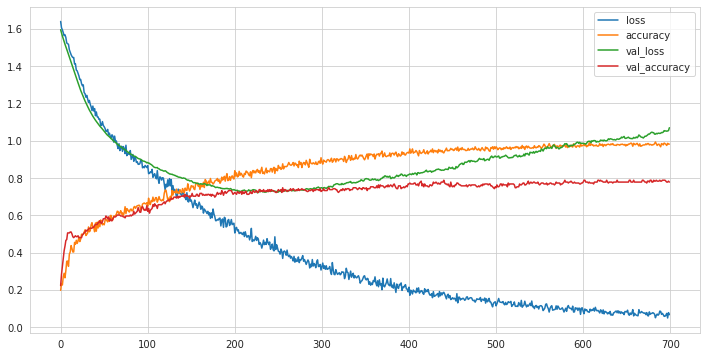

In [33]:
plotHistory(model_3_history)

In [34]:
print(X_train.shape[1])

57


In [35]:
model_4 = k.models.Sequential([
    k.layers.Dense(1024, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dropout(0.3),
    
    k.layers.Dense(512, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(256, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(128, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(64, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(5, activation='softmax'),
])
print(model_4.summary())
model_4_history = trainModel(model=model_4, epochs=500, optimizer='rmsprop')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1024)              59392     
                                                                 
 dropout_8 (Dropout)         (None, 1024)              0         
                                                                 
 dense_15 (Dense)            (None, 512)               524800    
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 128)              

Epoch 46/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0890 - accuracy: 0.9714 - val_loss: 1.4868 - val_accuracy: 0.7626
Epoch 47/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0764 - accuracy: 0.9786 - val_loss: 1.3283 - val_accuracy: 0.7626
Epoch 48/500
6/6 [==============================] - 0s 13ms/step - loss: 0.0549 - accuracy: 0.9929 - val_loss: 1.9133 - val_accuracy: 0.7273
Epoch 49/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1093 - accuracy: 0.9629 - val_loss: 1.5894 - val_accuracy: 0.7172
Epoch 50/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0593 - accuracy: 0.9814 - val_loss: 1.8007 - val_accuracy: 0.7273
Epoch 51/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1043 - accuracy: 0.9714 - val_loss: 1.7169 - val_accuracy: 0.7121
Epoch 52/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0438 - accuracy: 0.9843 - val_loss: 1.5864 - val_accuracy: 0.7475
Epoch 53/500


6/6 [==============================] - 0s 12ms/step - loss: 0.0672 - accuracy: 0.9829 - val_loss: 2.2423 - val_accuracy: 0.7323
Epoch 105/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0150 - accuracy: 0.9957 - val_loss: 2.1448 - val_accuracy: 0.7626
Epoch 106/500
6/6 [==============================] - 0s 16ms/step - loss: 0.0757 - accuracy: 0.9886 - val_loss: 2.8361 - val_accuracy: 0.7273
Epoch 107/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1042 - accuracy: 0.9771 - val_loss: 1.9538 - val_accuracy: 0.7828
Epoch 108/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0141 - accuracy: 0.9943 - val_loss: 2.1695 - val_accuracy: 0.7424
Epoch 109/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0423 - accuracy: 0.9900 - val_loss: 2.0556 - val_accuracy: 0.7576
Epoch 110/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 2.3519 - val_accuracy: 0.7525
Epoch 111/500
6/6 [=

Epoch 162/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0345 - accuracy: 0.9914 - val_loss: 2.6515 - val_accuracy: 0.7475
Epoch 163/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0552 - accuracy: 0.9957 - val_loss: 2.3640 - val_accuracy: 0.7475
Epoch 164/500
6/6 [==============================] - 0s 13ms/step - loss: 0.0145 - accuracy: 0.9957 - val_loss: 2.4061 - val_accuracy: 0.7323
Epoch 165/500
6/6 [==============================] - 0s 17ms/step - loss: 0.0097 - accuracy: 0.9971 - val_loss: 2.5170 - val_accuracy: 0.7273
Epoch 166/500
6/6 [==============================] - 0s 19ms/step - loss: 0.0140 - accuracy: 0.9986 - val_loss: 2.6885 - val_accuracy: 0.7374
Epoch 167/500
6/6 [==============================] - 0s 17ms/step - loss: 0.0102 - accuracy: 0.9971 - val_loss: 2.6423 - val_accuracy: 0.7525
Epoch 168/500
6/6 [==============================] - 0s 16ms/step - loss: 0.0677 - accuracy: 0.9857 - val_loss: 2.7766 - val_accuracy: 0.7677
Epoch 

6/6 [==============================] - 0s 11ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 2.6627 - val_accuracy: 0.7475
Epoch 220/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0142 - accuracy: 0.9971 - val_loss: 2.7606 - val_accuracy: 0.7424
Epoch 221/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0187 - accuracy: 0.9971 - val_loss: 2.4544 - val_accuracy: 0.7778
Epoch 222/500
6/6 [==============================] - 0s 14ms/step - loss: 0.0409 - accuracy: 0.9914 - val_loss: 2.4705 - val_accuracy: 0.7525
Epoch 223/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0408 - accuracy: 0.9900 - val_loss: 2.7473 - val_accuracy: 0.7323
Epoch 224/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0410 - accuracy: 0.9914 - val_loss: 2.7017 - val_accuracy: 0.6970
Epoch 225/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0428 - accuracy: 0.9914 - val_loss: 2.2592 - val_accuracy: 0.7424
Epoch 226/500
6/6 [=

Epoch 277/500
6/6 [==============================] - 0s 11ms/step - loss: 0.1093 - accuracy: 0.9871 - val_loss: 3.3297 - val_accuracy: 0.7727
Epoch 278/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0194 - accuracy: 0.9943 - val_loss: 3.4894 - val_accuracy: 0.7475
Epoch 279/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0110 - accuracy: 0.9914 - val_loss: 3.1496 - val_accuracy: 0.7626
Epoch 280/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0226 - accuracy: 0.9929 - val_loss: 3.4685 - val_accuracy: 0.7475
Epoch 281/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0105 - accuracy: 0.9986 - val_loss: 3.5685 - val_accuracy: 0.7576
Epoch 282/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0055 - accuracy: 0.9971 - val_loss: 3.4269 - val_accuracy: 0.7273
Epoch 283/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0029 - accuracy: 0.9986 - val_loss: 3.3908 - val_accuracy: 0.7424
Epoch 

6/6 [==============================] - 0s 11ms/step - loss: 4.3609e-04 - accuracy: 1.0000 - val_loss: 3.1513 - val_accuracy: 0.7778
Epoch 335/500
6/6 [==============================] - 0s 11ms/step - loss: 5.4552e-04 - accuracy: 1.0000 - val_loss: 3.3118 - val_accuracy: 0.7677
Epoch 336/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0057 - accuracy: 0.9986 - val_loss: 3.3550 - val_accuracy: 0.7626
Epoch 337/500
6/6 [==============================] - 0s 11ms/step - loss: 5.9062e-04 - accuracy: 1.0000 - val_loss: 3.7812 - val_accuracy: 0.7778
Epoch 338/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0276 - accuracy: 0.9943 - val_loss: 3.4410 - val_accuracy: 0.7424
Epoch 339/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0029 - accuracy: 0.9986 - val_loss: 3.3104 - val_accuracy: 0.7727
Epoch 340/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0276 - accuracy: 0.9943 - val_loss: 3.3754 - val_accuracy: 0.7727
Epoch 34

6/6 [==============================] - 0s 16ms/step - loss: 0.0300 - accuracy: 0.9986 - val_loss: 2.8448 - val_accuracy: 0.7677
Epoch 392/500
6/6 [==============================] - 0s 20ms/step - loss: 1.0131e-04 - accuracy: 1.0000 - val_loss: 2.9029 - val_accuracy: 0.7879
Epoch 393/500
6/6 [==============================] - 0s 15ms/step - loss: 1.1830e-04 - accuracy: 1.0000 - val_loss: 2.8565 - val_accuracy: 0.7778
Epoch 394/500
6/6 [==============================] - 0s 13ms/step - loss: 9.0201e-05 - accuracy: 1.0000 - val_loss: 3.1743 - val_accuracy: 0.7677
Epoch 395/500
6/6 [==============================] - 0s 17ms/step - loss: 0.0405 - accuracy: 0.9971 - val_loss: 3.4233 - val_accuracy: 0.7778
Epoch 396/500
6/6 [==============================] - 0s 15ms/step - loss: 0.0227 - accuracy: 0.9971 - val_loss: 3.3121 - val_accuracy: 0.7778
Epoch 397/500
6/6 [==============================] - 0s 16ms/step - loss: 0.0068 - accuracy: 0.9957 - val_loss: 3.1794 - val_accuracy: 0.7778
Epoch 39

6/6 [==============================] - 0s 11ms/step - loss: 0.0715 - accuracy: 0.9886 - val_loss: 3.0462 - val_accuracy: 0.7626
Epoch 449/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0041 - accuracy: 0.9971 - val_loss: 3.1171 - val_accuracy: 0.7525
Epoch 450/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0223 - accuracy: 0.9929 - val_loss: 3.2543 - val_accuracy: 0.7626
Epoch 451/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0112 - accuracy: 0.9957 - val_loss: 3.3871 - val_accuracy: 0.7525
Epoch 452/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0059 - accuracy: 0.9986 - val_loss: 3.1309 - val_accuracy: 0.7626
Epoch 453/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0631 - accuracy: 0.9914 - val_loss: 3.0711 - val_accuracy: 0.7677
Epoch 454/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0065 - accuracy: 0.9986 - val_loss: 3.0885 - val_accuracy: 0.7727
Epoch 455/500
6/6 [=

Max. Validation Accuracy 0.7979797720909119


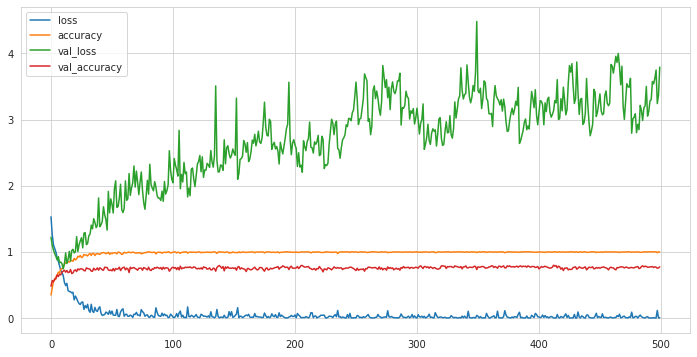

In [36]:
plotHistory(model_4_history)

# Model Evaluation

In [37]:
test_loss, test_acc  = model_4.evaluate(X_test, y_test, batch_size=128)
print("The test Loss is :",test_loss)
print("\nThe Best test Accuracy is :",test_acc*100)

1/1 [==============================] - 0s 14ms/step - loss: 4.1737 - accuracy: 0.7255
The test Loss is : 4.17366361618042

The Best test Accuracy is : 72.54902124404907


In [38]:
%%time
pred_acc = model_4.predict(X_test)

4/4 [==============================] - 0s 2ms/step
CPU times: user 94.1 ms, sys: 36 µs, total: 94.1 ms
Wall time: 87 ms


In [39]:
%%time
y_prob = model_4.predict(X_test) 
pred_labels = y_prob.argmax(axis=-1)

4/4 [==============================] - 0s 2ms/step
CPU times: user 47.3 ms, sys: 4.51 ms, total: 51.8 ms
Wall time: 43.2 ms


In [40]:
#print(len(pred_labels))
# i = 0      # test song
# display(X_test.iloc[i])
# index_label[pred_labels[i]]

In [41]:
%%time

########### TEST DATA #################


gtzan_new_test_df = pd.read_csv("../feature_extractor/gtzan_test_features.csv")

song_name_df = gtzan_new_test_df.iloc[:, :2]

gtzan_new_test_df = gtzan_new_test_df.iloc[:, 2:]

#print(gtzan_new_test_df.iloc[:, :])

gtzan_new_test_df = pd.DataFrame(scaler.transform(gtzan_new_test_df), columns=gtzan_new_test_df.columns)

#print(gtzan_new_test_df.iloc[0, :])

y_prob = model_1.predict(gtzan_new_test_df)
pred_labels = y_prob.argmax(axis=-1)

for i in range(1, len(pred_labels)+1):
    print(i, index_label[pred_labels[i-1]], "------------", song_name_df.iloc[i-1,1])

1/1 [==============================] - 0s 31ms/step
1 adventure ------------ Chaar Botal Vodka - Ragini MMS 2 128 Kbps.mp3
2 family ------------ country.00019.wav
3 party ------------ disco.00026.wav
4 adventure ------------ Chak De India.mp3
5 party ------------ FAZLIJA-HELIKOPTER-.mp3
6 adventure ------------ Its All About You - Sidhu Moose Wala.mp3
7 motivational ------------ reggae.00038.wav
8 motivational ------------ rock.00045.wav
9 motivational ------------ Badal Pe Paon Hain.mp3
10 relax ------------ Raabta.mp3
11 party ------------ Where-Is-The-Party.mp3
12 party ------------ Lollypop Lagelu(BhojpuriWap (mp3cut.net).mp3
13 adventure ------------ Pasoori Lyrics - Ali Sethi x Shae Gill Coke Studio Season 14.mp3
14 relax ------------ classicalemotify.mp3
CPU times: user 65.3 ms, sys: 13 µs, total: 65.3 ms
Wall time: 61.4 ms


In [42]:
# a = gtzan_new_test_df.to_numpy()

In [43]:
# a = a.astype(np.float32)

In [44]:
#y_prob = model_1.predict(gtzan_new_test_df)
#print(y_prob)

In [45]:
# model_4.layers[-2].output

In [46]:
# m = tf.keras.Model(inputs=model_4.inputs,outputs=model_4.layers[-2].output)

In [47]:
# m.predict(gtzan_new_test_df)

In [48]:
# m.predict(X_test)